# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import gc
import Orange
import sys

sys.path.append("../../")

from tqdm import tqdm

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
competitors = ["ADWIN", "HDDM", "NEWMA", "ChangeFinder", "DDM", "Window", "FLOSS", "ClaSS"]
dataset = "SleepDB"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(tqdm(methods)):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}",
                                     usecols=["dataset", eval_score], compression="gzip")
    gc.collect()

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

100%|██████████| 8/8 [00:00<00:00, 11.04it/s]


,dataset,ADWIN,HDDM,NEWMA,ChangeFinder,DDM,Window,FLOSS,ClaSS
0,SleepDB_SubjectST7011J0-PSG_EEG_Fpz-Cz,0.096,0.026,0.026,0.381,0.303,0.026,0.301,0.370
1,SleepDB_SubjectST7011J0-PSG_EEG_Pz-Oz,0.096,0.026,0.026,0.197,0.263,0.026,0.357,0.354
2,SleepDB_SubjectST7011J0-PSG_EOG_horizontal,0.096,0.026,0.026,0.291,0.365,0.026,0.274,0.369
3,SleepDB_SubjectST7011J0-PSG_EMG_submental,0.096,0.026,0.026,0.373,0.149,0.026,0.324,0.384
4,SleepDB_SubjectST7022J0-PSG_EEG_Fpz-Cz,0.089,0.030,0.030,0.410,0.325,0.030,0.418,0.523
5,SleepDB_SubjectST7022J0-PSG_EEG_Pz-Oz,0.085,0.030,0.030,0.241,0.241,0.030,0.364,0.392
6,SleepDB_SubjectST7022J0-PSG_EOG_horizontal,0.085,0.030,0.030,0.398,0.311,0.030,0.313,0.453
7,SleepDB_SubjectST7022J0-PSG_EMG_submental,0.087,0.030,0.030,0.374,0.291,0.030,0.223,0.382
8,SleepDB_SubjectST7041J0-PSG_EEG_Fpz-Cz,0.037,0.037,0.037,0.350,0.037,0.037,0.321,0.370
9,SleepDB_SubjectST7041J0-PSG_EEG_Pz-Oz,0.349,0.037,0.037,0.429,0.395,0.037,0.380,0.426


Let's calculate the mean/median/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4009/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ADWIN           0.078
HDDM            0.036
NEWMA           0.036
ChangeFinder    0.351
DDM             0.177
Window          0.036
FLOSS           0.308
ClaSS           0.401
dtype: float64

In [6]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4009/803467923.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ADWIN           0.064
HDDM            0.032
NEWMA           0.032
ChangeFinder    0.372
DDM             0.089
Window          0.032
FLOSS           0.314
ClaSS           0.400
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4009/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ADWIN           0.059
HDDM            0.013
NEWMA           0.013
ChangeFinder    0.092
DDM             0.152
Window          0.013
FLOSS           0.075
ClaSS           0.050
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ADWIN:wins=0 rank=4.57955
HDDM:wins=0 rank=5.29545
NEWMA:wins=0 rank=5.29545
ChangeFinder:wins=22 rank=2.22727
DDM:wins=6 rank=3.75
Window:wins=0 rank=5.29545
FLOSS:wins=11 rank=2.71591
ClaSS:wins=49 rank=1.54545


Let's plot and output the ranks.

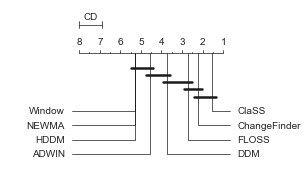

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4,
                                      filename=f"../../figures/cd_comparative_{dataset}.pdf")  #

Let's compute wins/losses against ClaSS.

In [11]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs ADWIN: (wins/ties/losses): 88/0/0
ClaSS vs HDDM: (wins/ties/losses): 88/0/0
ClaSS vs NEWMA: (wins/ties/losses): 88/0/0
ClaSS vs ChangeFinder: (wins/ties/losses): 60/0/28
ClaSS vs DDM: (wins/ties/losses): 81/0/7
ClaSS vs Window: (wins/ties/losses): 88/0/0
ClaSS vs FLOSS: (wins/ties/losses): 75/0/13


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4009/2755163004.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4009/2755163004.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


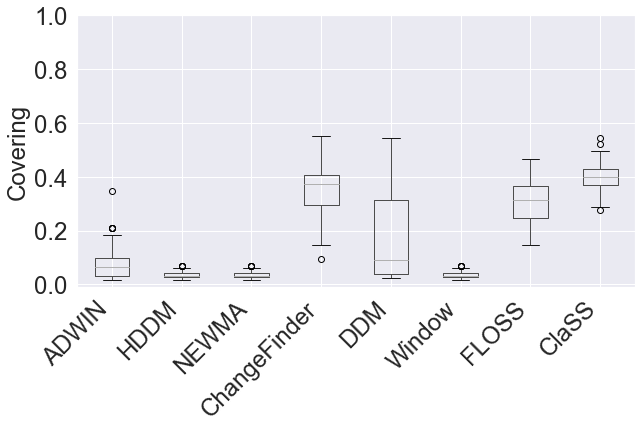

In [12]:
fontsize = 24
_, ax = plt.subplots(figsize=(10, 5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight") 